# 🌲 Why Random Forest Works So Well
---

## 1. Core ML Problem: Bias–Variance Tradeoff

In machine learning, prediction error mainly comes from two sources:

### Bias
- Error due to **oversimplification**
- Model fails to learn patterns even on training data
- Leads to **underfitting**

Examples:
- Linear Regression
- Logistic Regression (many cases)

### Variance
- Error due to **over-complexity**
- Model memorizes training data
- Sensitive to noise and outliers
- Leads to **overfitting**

Examples:
- Fully grown Decision Trees
- kNN with very small `$k$`

---

## 2. Inverse Relationship (The Fundamental Limitation)

Bias and variance have an **inverse relationship**:

- Reducing bias → increases variance  
- Reducing variance → increases bias  

Most ML algorithms fail because they cannot reduce both simultaneously.

---

## 3. Where Classical Algorithms Stand

| Algorithm | Bias | Variance |
|---------|------|----------|
| Linear / Logistic Regression | High | Low |
| Decision Tree (deep) | Low | High |
| SVM (complex kernel) | Low | High |

No single model achieves **low bias + low variance** alone.

---

## 4. Random Forest: The Core Idea

Random Forest starts with a **dangerous base model**:

> A fully grown Decision Tree  
> (Low bias, High variance)

Instead of simplifying the model, Random Forest:
- **Keeps bias low**
- **Reduces variance using averaging**

---

## 5. Why a Single Decision Tree Fails

A deep decision tree:
- Fits every training point
- Reacts strongly to noise
- Small data change → completely different tree

This makes it **high variance** and unreliable on new data.

---

## 6. How Random Forest Works (Mechanism)

### Step 1: Multiple Trees
Train many independent decision trees.

### Step 2: Bootstrapping (Row Sampling)
Each tree is trained on a **random subset of rows** (with replacement).

Effect:
- Outliers are not seen by all trees
- Noise influence is distributed

### Step 3: Feature Randomness
At each split, only a **random subset of features** is considered.

Effect:
- Trees become less correlated
- Dominant features cannot control all trees

### Step 4: Aggregation
- Classification → **majority voting**
- Regression → **mean prediction**

---

## 7. Why Variance Reduces (Key Intuition)

Assume:
- `$T = 100$` trees
- A noisy outlier exists

That outlier:
- Appears in only a few trees
- Has negligible impact after averaging

Thus:
- Individual errors cancel out
- Final prediction becomes stable

---

## 8. Why Bias Remains Low

Each tree:
- Is deep
- Is expressive
- Can model complex patterns

So:
- No underfitting
- Bias remains low

---

## 9. Mathematical View (Regression)

Random Forest prediction:

$$
\hat{y}(x) = \frac{1}{T} \sum_{t=1}^{T} \hat{y}_t(x)
$$

Variance of the averaged estimator:

$$
\mathrm{Var}(\hat{y}) = \frac{\sigma^2}{T}
$$

As number of trees $T$ increases:
- Variance decreases
- Bias stays nearly constant

---

## 10. Classification Experiment (Intuition)

### Single Decision Tree
- Very irregular decision boundary
- Overfits noisy points
- Poor generalization

### Random Forest
- Smooth decision boundary
- Ignores isolated noise
- Strong generalization

---

## 11. Regression Experiment (Intuition)

### Decision Tree Regression
- Tries to touch every point
- Overfits noise
- High variance

### Random Forest Regression
- Smooth curve
- Captures underlying trend
- Lower Mean Squared Error (MSE)

---

## 12. Why Random Forest Beats Bagging

Bagging:
- Random rows
- Same feature space

Random Forest:
- Random rows **+ random features**

This further reduces correlation between trees → stronger variance reduction.

---

## 13. Final Outcome

| Property | Decision Tree | Random Forest |
|-------|---------------|---------------|
| Bias | Low | Low |
| Variance | High | Low |
| Generalization | Poor | Excellent |

---

## 14. One-Line Interview Answer

**Random Forest works well because it converts a low-bias, high-variance model into a low-bias, low-variance ensemble by averaging many decorrelated decision trees trained on random subsets of data and features.**

---

## 15. When to Use Random Forest

✔ Noisy tabular data  
✔ Non-linear patterns  
✔ Strong baseline model  
✔ Minimal tuning required  

---

## 16. When Not to Use Random Forest

✘ Very small datasets  
✘ High-dimensional sparse data (text)  
✘ Strict interpretability needed  

---

## Final Takeaway

Random Forest does not break the bias–variance tradeoff.  
It **exploits randomness and averaging** to reduce variance **without increasing bias**.


# 🌲 Random Forest vs Bagging
### Theory, Intuition, Implementation Logic (Interview-Critical)

This document explains the **exact difference between Bagging and Random Forest**.  
It focuses on **how they differ internally**, **why Random Forest usually performs better**,  
and **how to answer this correctly in interviews**.

---

## 1. Background

Random Forest is **internally based on Bagging**, but it is **not the same algorithm**.

> **Bagging = a general ensemble technique**  
> **Random Forest = a specific algorithm built on Bagging + extra randomness**

This distinction is **very important for interviews**.

---

## 2. First Difference: Choice of Base Model

### Bagging (Bootstrap Aggregation)

- Bagging is a **generic ensemble technique**
- Base models can be **any algorithm**
  - Decision Trees
  - SVM
  - kNN
  - Logistic Regression
- All base models must be **the same type**, but the type is your choice

In sklearn:
- `BaggingClassifier` has a parameter:
  - `base_estimator`

---

### Random Forest

- Base model is **fixed**
- **Only Decision Trees are allowed**
- You cannot change the base algorithm

In sklearn:
- `RandomForestClassifier` has **no `base_estimator` parameter**

---

### Summary (Difference 1)

| Aspect | Bagging | Random Forest |
|-----|--------|--------------|
| Base algorithm | Any | Only Decision Trees |
| Flexibility | High | Restricted |
| Design | Generic technique | Specialized algorithm |

---

## 3. Common Confusion (Very Important)

**Question:**  
> If I use Bagging with Decision Trees as base models, does it become Random Forest?

**Answer:**  
❌ **No**

Even if:
- Bagging  
- Base estimator = Decision Tree  

It is **still not Random Forest**.

Why?  
Because there is a **second, deeper difference**.

---

## 4. Second Difference (Core Difference): Feature Sampling

Both algorithms use **row sampling (bootstrapping)**.  
The difference lies in **how feature (column) sampling is done**.

---

## 5. Feature Sampling in Bagging

### How it works

- Feature sampling happens **once per tree**
- Before training starts:
  - A fixed subset of columns is selected
- That tree **can only use those columns forever**

This is called:

> **Tree-level feature sampling**

---

### Example (Bagging)

- Dataset has `$5$` input features
- You choose `$2$` features per tree

Tree 1:
- Uses only `$X_1, X_3$`
- All splits use only `$X_1$` or `$X_3$`

Tree 2:
- Uses only `$X_2, X_5$`
- All splits use only `$X_2$` or `$X_5$`

No other features can ever appear inside that tree.

---

## 6. Feature Sampling in Random Forest

### How it works

- Feature sampling happens **at every split**
- For **each node**:
  - A new random subset of features is chosen
- Split is selected **only from that subset**

This is called:

> **Node-level feature sampling**

---

### Example (Random Forest)

- Dataset has `$5$` input features
- You choose `$2$` features per split

Root node:
- Randomly selects `$X_2, X_4$`

Next node:
- Randomly selects `$X_1, X_3$`

Next node:
- Randomly selects `$X_1, X_5$`

Each split sees **different features**.

---

## 7. Why This Difference Matters

Node-level feature sampling:

- Increases randomness
- Reduces correlation between trees
- Prevents dominant features from controlling the model
- Produces **stronger variance reduction**

This is why:

> **Random Forest usually outperforms Bagging**

---

## 8. Visual Intuition

### Bagging
- Randomness = row sampling
- Feature randomness = limited
- Trees are still correlated

### Random Forest
- Randomness = row sampling + node-level feature sampling
- Trees are highly decorrelated
- Ensemble averaging becomes more powerful

---

## 9. Performance Implication

| Property | Bagging | Random Forest |
|-------|--------|--------------|
| Row randomness | Yes | Yes |
| Feature randomness | Tree-level | Node-level |
| Tree correlation | Higher | Lower |
| Variance reduction | Moderate | Strong |
| Typical performance | Good | Better |

---

## 10. Interview-Perfect Answer (Short)

**Bagging is a general ensemble method that allows any base algorithm, while Random Forest is a specialized Bagging algorithm that uses only decision trees and introduces additional randomness by performing feature sampling at every node instead of once per tree.**

---

## 11. Interview-Perfect Answer (Expanded)

**Even when Bagging uses decision trees as base models, it is still not Random Forest.  
The key difference is feature sampling: Bagging selects a fixed subset of features per tree, whereas Random Forest randomly selects a new subset of features at every split. This node-level randomness decorrelates trees more effectively, leading to better variance reduction and superior performance.**

---

## Final Takeaway

Random Forest ≠ Bagging with trees  

The **real power** of Random Forest comes from:
- Bootstrapping (rows)
- **Node-level feature sampling**
- Averaging decorrelated trees

That extra randomness is what makes Random Forest stronger.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [ ]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [ ]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-1.339307,1.320520,-1.290165,2.068494,-0.253888,0
1,-0.411874,2.077191,2.148849,0.510779,-1.552396,1
2,-0.805382,-0.374989,-0.543223,0.209422,-1.592133,1
3,0.549945,-1.393852,-1.695205,-0.468049,-3.740120,1
4,0.575661,2.010058,1.093066,-0.420957,-2.480502,1


In [ ]:
bag = BaggingClassifier(max_features=2)
bag.fit(df.iloc[:,:5],df.iloc[:,-1])

BaggingClassifier(max_features=2)

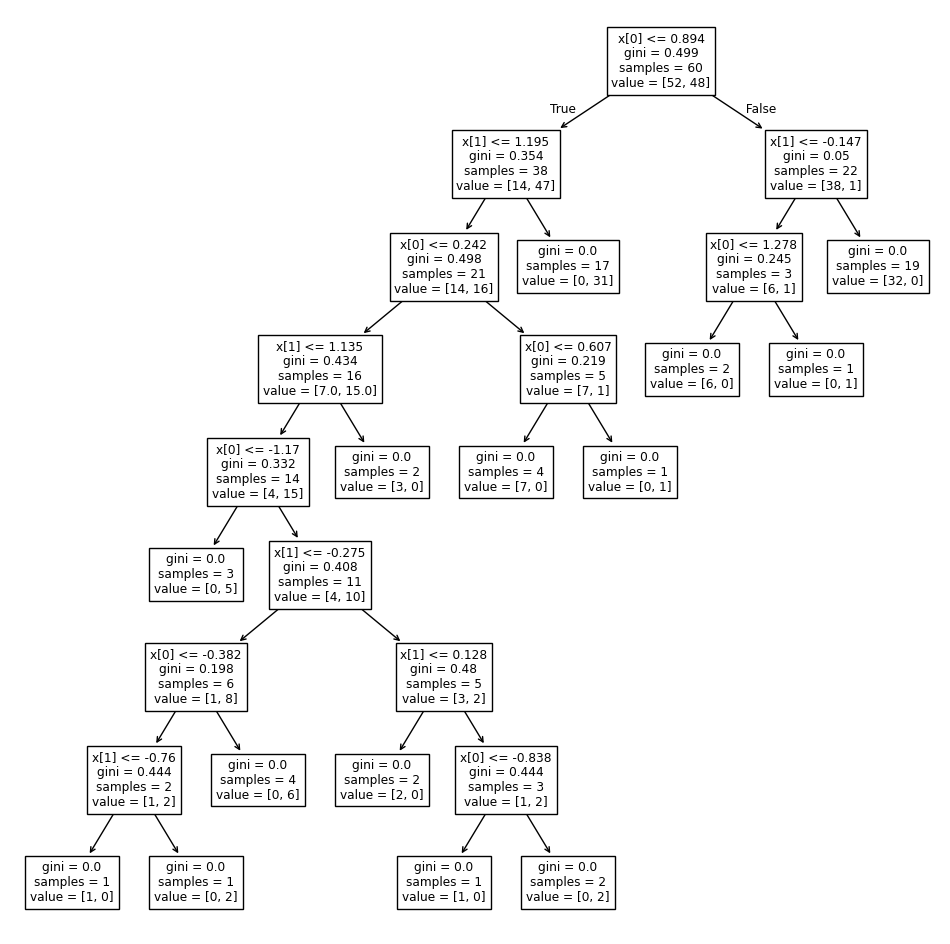

In [ ]:
plt.figure(figsize=(12,12))
plot_tree(bag.estimators_[0])
plt.show()

In [ ]:
rf = RandomForestClassifier(max_features=2)


rf.fit(df.iloc[:,:5],df.iloc[:,-1])

RandomForestClassifier(max_features=2)

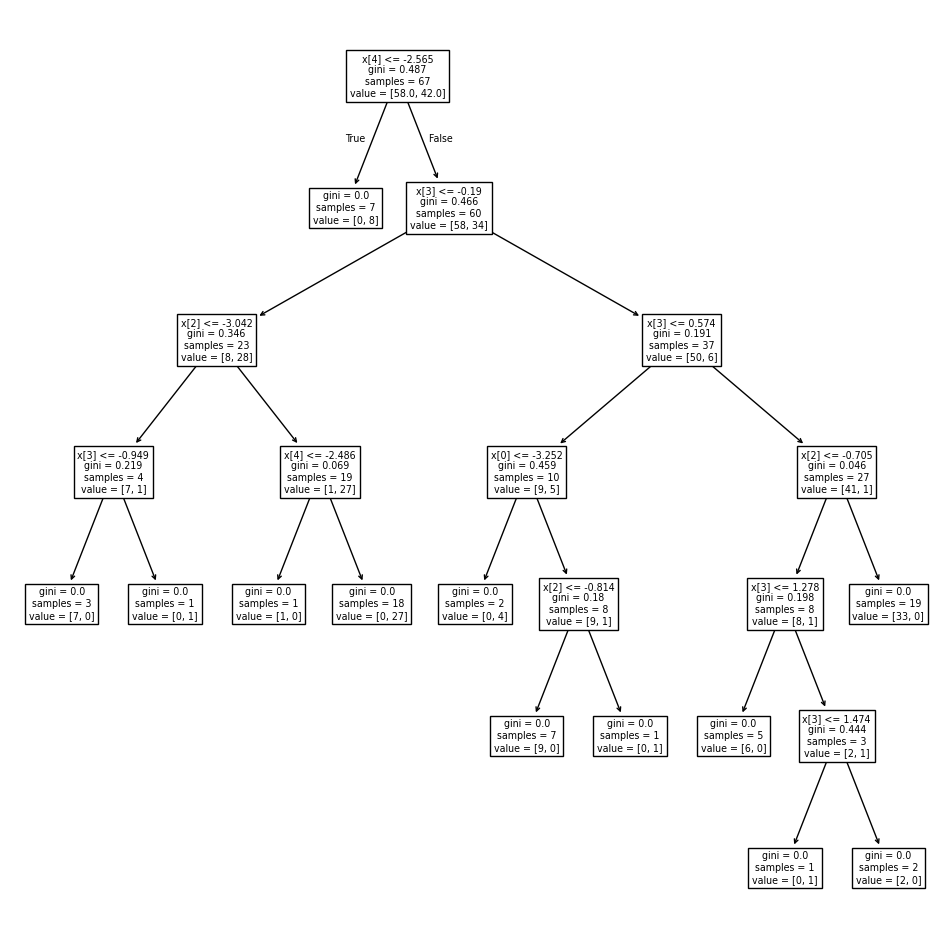

In [ ]:

plt.figure(figsize=(12,12))
plot_tree(rf.estimators_[4])
plt.show()